# Box Office Prediction

### Part 1 - EXPLORATORY DATA ANALYSIS

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor



# load in data
movies = pd.read_csv(r'C:\Users\sonal\OneDrive\Desktop\Education\001 Graduate School\Summer 2024\Machine Learning\train.csv')
movies2 = pd.read_csv(r'C:\Users\sonal\OneDrive\Desktop\Education\001 Graduate School\Summer 2024\Machine Learning\train.csv')

# show data
print(movies.head())

   id                              belongs_to_collection    budget  \
0   1  [{'id': 313576, 'name': 'Hot Tub Time Machine ...  14000000   
1   2  [{'id': 107674, 'name': 'The Princess Diaries ...  40000000   
2   3                                                NaN   3300000   
3   4                                                NaN   1200000   
4   5                                                NaN         0   

                                              genres  \
0                     [{'id': 35, 'name': 'Comedy'}]   
1  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
2                      [{'id': 18, 'name': 'Drama'}]   
3  [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...   
4  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   

                            homepage    imdb_id original_language  \
0                                NaN  tt2637294                en   
1                                NaN  tt0368933                en   
2  http://sonyclassics.com/whiplash

In [2]:
# prints dimensions of dataset
data_dimensions = movies.shape
print(f"Dimensions of the dataset: {data_dimensions}")

Dimensions of the dataset: (3000, 23)


In [3]:
# prints the names of attributes
attributes = movies.columns.tolist()
print(f"Attributes of the dataset: {attributes}")

Attributes of the dataset: ['id', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue']


In [4]:
# prints the summary stats of each variable
summary = movies.describe(include='all')
print(summary)

                 id                              belongs_to_collection  \
count   3000.000000                                                604   
unique          NaN                                                422   
top             NaN  [{'id': 645, 'name': 'James Bond Collection', ...   
freq            NaN                                                 16   
mean    1500.500000                                                NaN   
std      866.169729                                                NaN   
min        1.000000                                                NaN   
25%      750.750000                                                NaN   
50%     1500.500000                                                NaN   
75%     2250.250000                                                NaN   
max     3000.000000                                                NaN   

              budget                         genres  \
count   3.000000e+03                           2993   
u

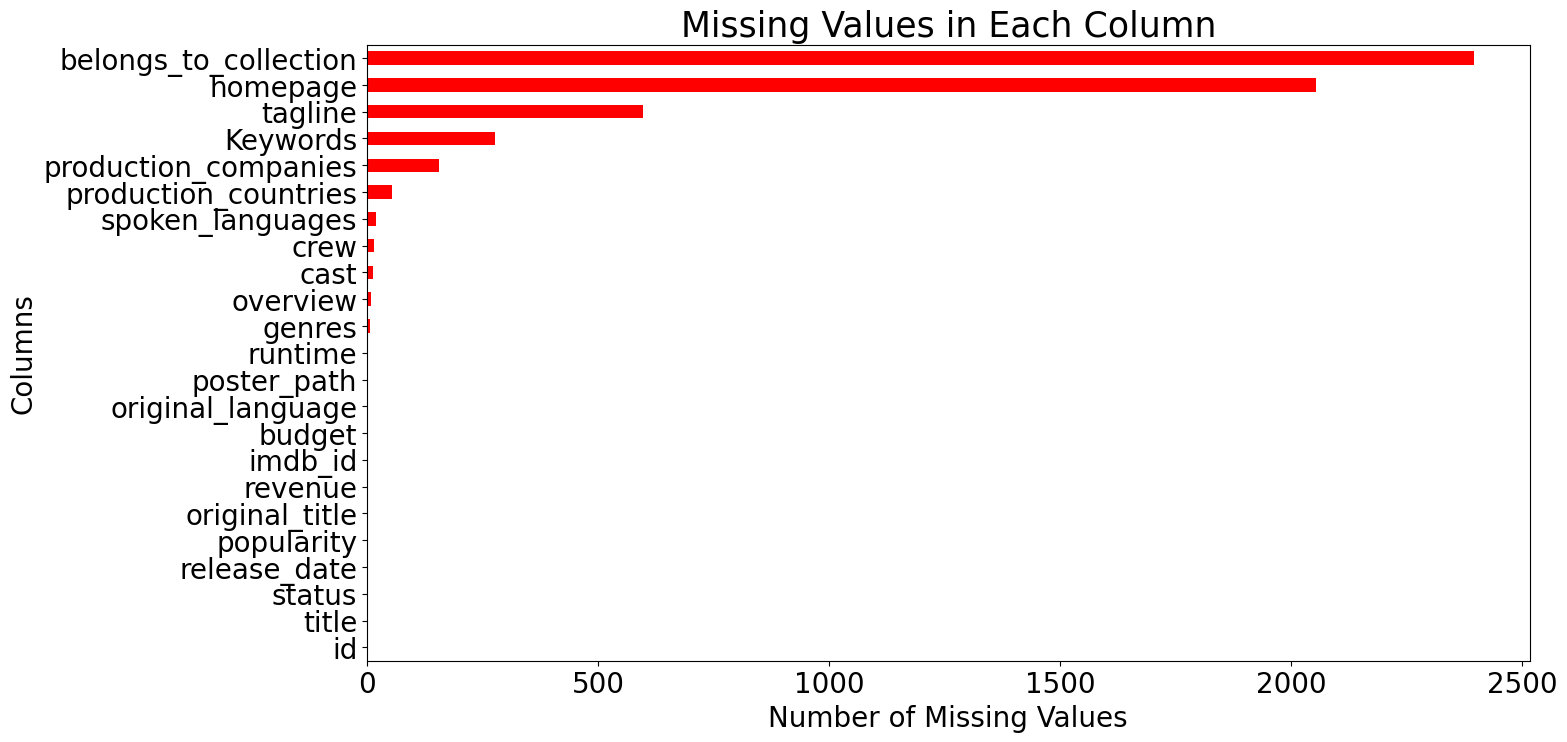

In [5]:
# sets fig size, calculates missing values in columns, sorts columns in ascending order of missing vals
# finally prints horizontal bar plot
fig = plt.figure(figsize=(15, 8))
movies.isna().sum().sort_values(ascending=True).plot(kind='barh', color='red', fontsize=20)
plt.title('Missing Values in Each Column', fontsize=25)
plt.xlabel('Number of Missing Values', fontsize=20)
plt.ylabel('Columns', fontsize=20)
plt.show()

In [6]:
# shows NULL values in each column
null_values_per_column = movies.isna().sum()
print("NULL values per column:")
print(null_values_per_column)

NULL values per column:
id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64


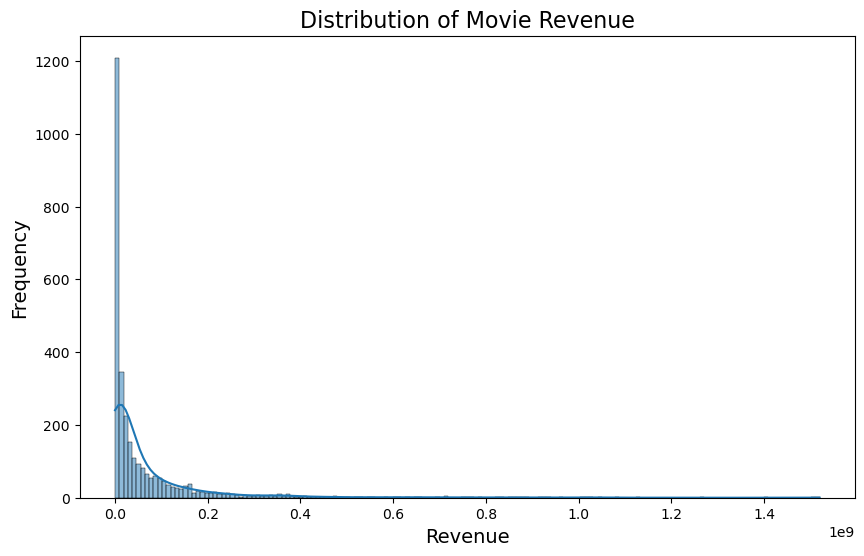

In [7]:
# plots the distribution of movie revenue
plt.figure(figsize=(10, 6))
sns.histplot(movies['revenue'], kde=True)
plt.title('Distribution of Movie Revenue', fontsize=16)
plt.xlabel('Revenue', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [8]:
# finds the movie with the highest revenue
max_re= movies[movies['revenue']== max(movies['revenue'])]
max_re.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
1126,1127,"[{'id': 86311, 'name': 'The Avengers Collectio...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://marvel.com/avengers_movie/,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,89.887648,...,4/25/12,143.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Some assembly required.,The Avengers,"[{'id': 242, 'name': 'new york'}, {'id': 5539,...","[{'cast_id': 46, 'character': 'Tony Stark / Ir...","[{'credit_id': '52fe4495c3a368484e02b1cf', 'de...",1519557910


In [9]:
# sorts by the 'revenue' column in descending order
top_20_movies_by_revenue = movies.sort_values(by='revenue', ascending=False).head(20)
# shows the top 20 movies
top_20_movies_by_revenue

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
1126,1127,"[{'id': 86311, 'name': 'The Avengers Collectio...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://marvel.com/avengers_movie/,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,89.887648,...,4/25/12,143.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Some assembly required.,The Avengers,"[{'id': 242, 'name': 'new york'}, {'id': 5539,...","[{'cast_id': 46, 'character': 'Tony Stark / Ir...","[{'credit_id': '52fe4495c3a368484e02b1cf', 'de...",1519557910
1761,1762,"[{'id': 9485, 'name': 'The Fast and the Furiou...",190000000,"[{'id': 28, 'name': 'Action'}]",http://www.furious7.com/,tt2820852,en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,27.275687,...,4/1/15,137.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Vengeance Hits Home,Furious 7,"[{'id': 830, 'name': 'car race'}, {'id': 3428,...","[{'cast_id': 17, 'character': 'Dominic Toretto...","[{'credit_id': '52fe4cc8c3a36847f823e681', 'de...",1506249360
2770,2771,"[{'id': 86311, 'name': 'The Avengers Collectio...",280000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://marvel.com/movies/movie/193/avengers_ag...,tt2395427,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,37.379420,...,4/22/15,141.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A New Age Has Come.,Avengers: Age of Ultron,"[{'id': 8828, 'name': 'marvel comic'}, {'id': ...","[{'cast_id': 76, 'character': 'Tony Stark / Ir...","[{'credit_id': '55d5f7d4c3a3683e7e0016eb', 'de...",1405403694
684,685,NaN,160000000,"[{'id': 10751, 'name': 'Family'}, {'id': 14, '...",http://movies.disney.com/beauty-and-the-beast-...,tt2771200,en,Beauty and the Beast,A live-action adaptation of Disney's version o...,287.253654,...,3/16/17,129.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Be our guest.,Beauty and the Beast,"[{'id': 254, 'name': 'france'}, {'id': 2343, '...","[{'cast_id': 174, 'character': 'Belle', 'credi...","[{'credit_id': '551879bec3a3681f840004eb', 'de...",1262886337
2322,2323,"[{'id': 8650, 'name': 'Transformers Collection...",195000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",http://www.transformersmovie.com/,tt1399103,en,Transformers: Dark of the Moon,Sam Witwicky takes his first tenuous steps int...,4.503505,...,6/28/11,154.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The invasion we always feared. An enemy we nev...,Transformers: Dark of the Moon,"[{'id': 305, 'name': 'moon'}, {'id': 1612, 'na...","[{'cast_id': 3, 'character': 'Sam Witwicky', '...","[{'credit_id': '537f0b740e0a2624b40044d0', 'de...",1123746996
906,907,"[{'id': 263, 'name': 'The Dark Knight Collecti...",250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,tt1345836,en,The Dark Knight Rises,Following the death of District Attorney Harve...,20.582580,...,7/16/12,165.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Legend Ends,The Dark Knight Rises,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",NaN,NaN,1084939099
2135,2136,"[{'id': 295, 'name': 'Pirates of the Caribbean...",380000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://disney.go.com/pirates/index-on-stranger...,tt1298650,en,Pirates of the Caribbean: On Stranger Tides,Captain Jack Sparrow crosses paths with a woma...,27.887720,...,5/14/11,136.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Live Forever Or Die Trying.,Pirates of the Caribbean: On Stranger Tides,"[{'id': 658, 'name': 'sea'}, {'id': 1316, 'nam...","[{'cast_id': 15, 'character': 'Captain Jack Sp...","[{'credit_id': '566b4f54c3a3683f56005151', 'de...",1045713802
2562,2563,"[{'id': 137697, 'name': 'Finding Nemo Collecti...",200000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://movies.dis

In [10]:
# shows top 20 movies by budget and revenue
top_20_budget_and_revenue = top_20_movies_by_revenue[['budget', 'revenue']]
top_20_budget_and_revenue

,budget,revenue
1126,220000000,1519557910
1761,190000000,1506249360
2770,280000000,1405403694
684,160000000,1262886337
2322,195000000,1123746996
906,250000000,1084939099
2135,380000000,1045713802
2562,200000000,1028570889
881,200000000,1025491110
734,150000000,1023784195


In [11]:
# selects row where the 'revenue' column has the minimum value and does a random sample
min_re = movies[movies['revenue']== min(movies['revenue'])]
min_re.sample()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
347,348,NaN,12,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",NaN,tt0118172,en,The Wind in the Willows,"Jailed for his reckless driving, rambunctious ...",1.410322,...,10/16/96,84.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Go wild in the country!,The Wind in the Willows,NaN,"[{'cast_id': 2, 'character': 'Toad', 'credit_i...","[{'credit_id': '59ce7655c3a3686aca01a522', 'de...",1


In [12]:
# sorts by'revenue' column in descending order and selects top 20 rows
lowest_20_movies_by_revenue = movies.sort_values(by='revenue', ascending=False).tail(20)
lowest_20_movies_by_revenue

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
450,451,NaN,23000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0360139,en,Chasing Liberty,"The President's daughter, unable to experience...",5.950792,...,1/9/04,111.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,How do you fall in love with the whole world w...,Chasing Liberty,"[{'id': 110, 'name': 'venice'}, {'id': 220, 'n...","[{'cast_id': 1, 'character': 'Anna Foster', 'c...","[{'credit_id': '563c813992514150af00414f', 'de...",12
312,313,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0380277,en,The Cookout,When Todd Anderson signs a $30 million deal wi...,1.758079,...,9/3/04,97.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"This summer, get your grill on!",The Cookout,"[{'id': 10267, 'name': 'comedy'}]","[{'cast_id': 1, 'character': 'blin bling', 'cr...","[{'credit_id': '52fe477f9251416c7509b8ed', 'de...",12
1141,1142,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10769, 'n...",NaN,tt1922561,ko,북촌방향,Sang-Joon is a professor in the film departmen...,1.042432,...,9/8/11,79.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,The Day He Arrives,NaN,"[{'cast_id': 3, 'character': 'Sungjoon', 'cred...","[{'credit_id': '52fe49499251416c910a86f1', 'de...",11
665,666,"[{'id': 86668, 'name': 'Elektra Luxx Collectio...",0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",http://www.elektraluxx-movie.com/,tt1340773,en,Elektra Luxx,A favor for a woman from her past throws the l...,4.118699,...,3/14/10,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,From adult film star to functioning adult.,Elektra Luxx,"[{'id': 10183, 'name': 'independent film'}, {'...","[{'cast_id': 3, 'character': 'Elektra Luxx', '...","[{'credit_id': '52fe48f6c3a36847f818264f', 'de...",10
280,281,"[{'id': 381396, 'name': 'Bats Collection', 'po...",0,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",NaN,tt0200469,en,Bats,Genetically mutated bats escape and it's up to...,2.584025,...,10/22/99,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They will suck you dry,Bats,"[{'id': 2766, 'name': 'mutation'}, {'id': 5155...","[{'cast_id': 1, 'character': 'Sheriff Emmett K...","[{'credit_id': '52fe437b9251416c750120e3', 'de...",10
2251,2252,NaN,130,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,tt1729637,hi,Bodyguard,Lovely Singh (Salman Khan) is the bodyguard of...,2.402032,...,8/31/11,130.0,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Released,NaN,Bodyguard,"[{'id': 2251, 'name': 'lie'}, {'id': 2913, 'na...","[{'cast_id': 1, 'character': 'Lovely B. Singh'...","[{'credit_id': '52fe48a1c3a368484e102d25', 'de...",8
639,640,NaN,6,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,tt0183659,en,Pollock,"In August of 1949, Life Magazine ran a banner ...",11.179864,...,9/6/00,122.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A true portrait of life and art.,Pollock,"[{'id': 2679, 'name': 'artist'}, {'id': 3836, ...","[{'cast_id': 1, 'character': 'Jackson Pollock'...","[{'credit_id': '52fe44f19251416c75046447', 'de...",8
2582,2583,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,tt0339230,sv,Kopps,"A small Swedish village, H√∂gbotr√§sk, is so p...",2.939129,...,2/6/03,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kops,"[{'id': 5543, 'name': 'cow'}, {'id': 7490, 'na...","[{'cast_id': 1, 'character': 'Jacob', 'credit_...","[{'credit_id': '52fe44ddc3a36847f80ae983', 'de...",8
1190,1191,NaN,0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",NaN,tt0089984,en,He-Man and She-Ra: The Secret of the Sword,After experiencing traumatic nightmares of a t...,2.087446,...,1/1/85,100.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,He-Man and She-Ra: The Secret of the Sword,"[{'id': 1400, 'name': 'swordplay'}, {'id': 193...","[{'cast_id': 

In [13]:
# selects only the 'budget' and 'revenue' columns
lowest_20_movies_and_revenue = lowest_20_movies_by_revenue[['budget', 'revenue']]
lowest_20_movies_and_revenue

,budget,revenue
450,23000000,12
312,16000000,12
1141,0,11
665,0,10
280,0,10
2251,130,8
639,6,8
2582,0,8
1190,0,7
2490,6400000,6


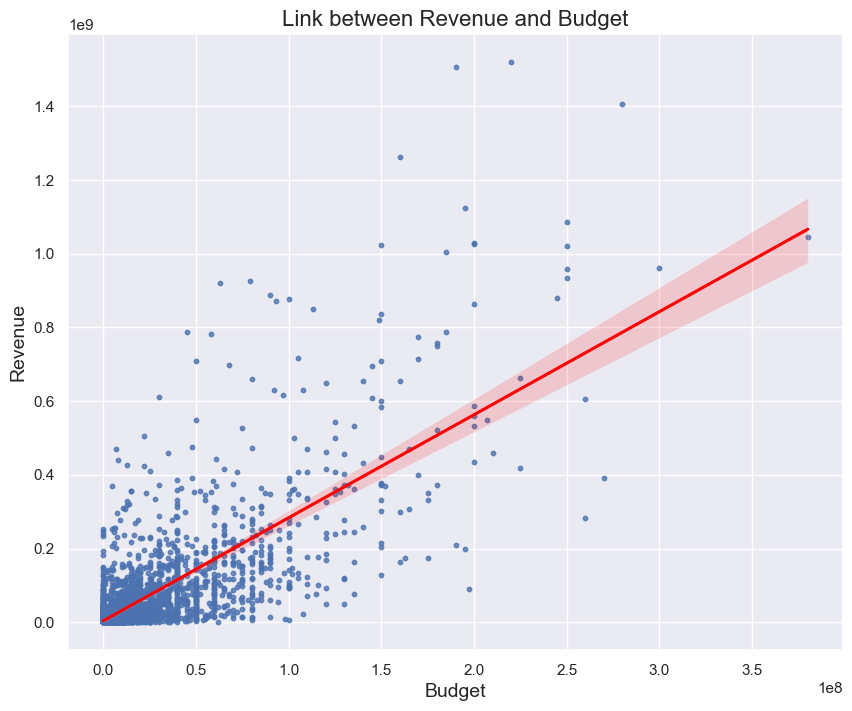

In [14]:
sns.set()
# converts 'budget' and 'revenue' columns to arrays and creates plot
x = np.array(movies["budget"])
y = np.array(movies["revenue"])
fig = plt.figure(figsize=(10, 8))
sns.regplot(x=x, y=y, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.xlabel("Budget", fontsize=14)
plt.ylabel("Revenue", fontsize=14)
plt.title("Link between Revenue and Budget", fontsize=16)
plt.show()

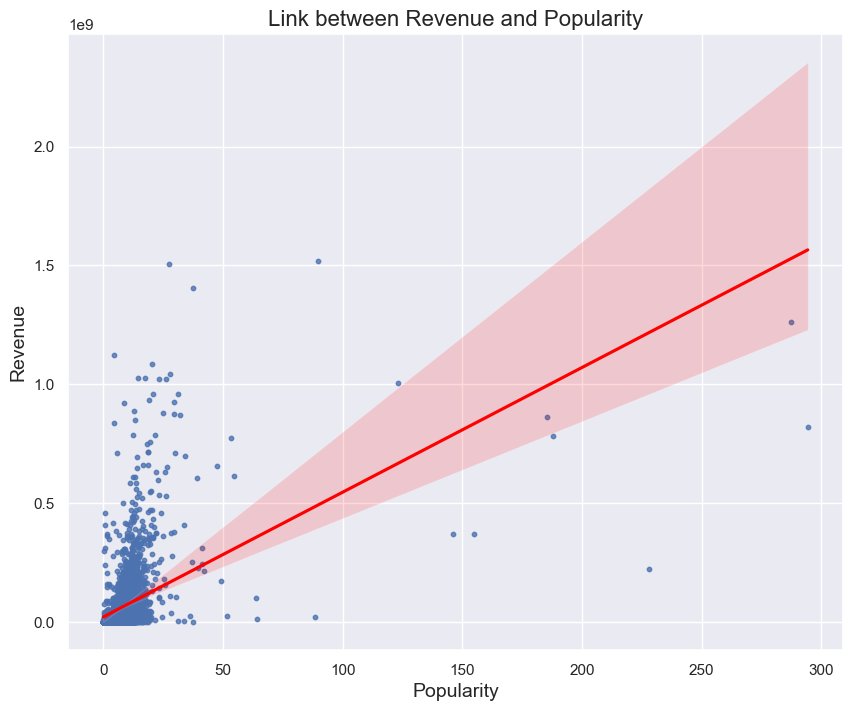

In [15]:
sns.set()
# converts 'budget' and 'revenue' columns to arrays and creates plot
x = np.array(movies["popularity"])
y = np.array(movies["revenue"])
fig = plt.figure(figsize=(10, 8))
sns.regplot(x=x, y=y, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.xlabel("Popularity", fontsize=14)
plt.ylabel("Revenue", fontsize=14)
plt.title("Link between Revenue and Popularity", fontsize=16)
plt.show()

In [16]:
# date analysis - extracts year,month and day on which the movies were released
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')
print(movies['release_date'].head())
movies['release_year'] = movies['release_date'].dt.year
movies['release_month'] = movies['release_date'].dt.month
movies['release_day'] = movies['release_date'].dt.day
movies['release_year']
movies['release_month']
movies['release_day']

0   2015-02-20
1   2004-08-06
2   2014-10-10
3   2012-03-09
4   2009-02-05
Name: release_date, dtype: datetime64[ns]


0       20
1        6
2       10
3        9
4        5
        ..
2995    22
2996    28
2997    11
2998    16
2999    22
Name: release_day, Length: 3000, dtype: int64

In [17]:
# extracts gender from the cast column and see if it gives us something
def parse_gender(cast_str):
    if pd.isna(cast_str):
        return []
    cast = ast.literal_eval(cast_str)
    return [member['gender'] for member in cast]
# applies the function to the cast column and create a new column for parsed cast
movies['parsed_gender'] = movies['cast'].apply(parse_gender)
cast_exploded = movies.explode('parsed_gender')
print(cast_exploded[['cast', 'parsed_gender']].head())

                                                cast parsed_gender
0  [{'cast_id': 4, 'character': 'Lou', 'credit_id...             2
0  [{'cast_id': 4, 'character': 'Lou', 'credit_id...             2
0  [{'cast_id': 4, 'character': 'Lou', 'credit_id...             2
0  [{'cast_id': 4, 'character': 'Lou', 'credit_id...             2
0  [{'cast_id': 4, 'character': 'Lou', 'credit_id...             2


In [18]:
cast_exploded['parsed_gender'].value_counts()

2    27949
0    20329
1    13533
Name: parsed_gender, dtype: int64

In [19]:
# extracts gender from the crew column and see if it gives us something
def parse_gender(cast_str):
    if pd.isna(cast_str):
        return []
    cast = ast.literal_eval(cast_str)
    return [member['gender'] for member in cast]
# applies the function to the crew column and create a new column for parsed cast
movies['parsed_gender_crew'] = movies['crew'].apply(parse_gender)
cast_exploded = movies.explode('parsed_gender_crew')
print(cast_exploded[['cast', 'parsed_gender_crew']].head())

                                                cast parsed_gender_crew
0  [{'cast_id': 4, 'character': 'Lou', 'credit_id...                  0
0  [{'cast_id': 4, 'character': 'Lou', 'credit_id...                  2
0  [{'cast_id': 4, 'character': 'Lou', 'credit_id...                  2
0  [{'cast_id': 4, 'character': 'Lou', 'credit_id...                  2
0  [{'cast_id': 4, 'character': 'Lou', 'credit_id...                  2


In [20]:
# if a movie belongs to a collection or not(1 for yes,0 for no or NAN)
movies['belongs_to_collection'] = movies['belongs_to_collection'].apply(lambda x: 0 if pd.isna(x) else 1)

In [21]:
# if a movie has a homepage or not(1 for yes,0 for no or NAN)
movies['homepage'] = movies2['homepage'].apply(lambda x: 0 if pd.isna(x) else 1)
movies['homepage'].value_counts()

0    2054
1     946
Name: homepage, dtype: int64

### Step 2 - FEATURE ENGINEERING

In [22]:
# computes mean runtime, popularity, and budget by release year and adds these as new columns
# extracts the day of the week and the quarter from the release date and adds these as new columns
movies['meanruntimeByYear'] = movies.groupby("release_year")["runtime"].aggregate('mean')
movies['meanPopularityByYear'] = movies.groupby("release_year")["popularity"].aggregate('mean')
movies['meanBudgetByYear'] = movies.groupby("release_year")["budget"].aggregate('mean')
movies['release_dayofweek'] = movies['release_date'].dt.dayofweek 
movies['release_quarter'] = movies['release_date'].dt.quarter 

# creates budget-related ratio features based on runtime, popularity, and release year
# creates popularity-related ratio features based on release year
# converts the 'homepage' column to binary indicating the presence of a homepage
# fills missing values in the 'runtime' column with the mean runtime
movies['_budget_runtime_ratio'] = movies['budget']/movies['runtime'] 
movies['_budget_popularity_ratio'] = movies['budget']/movies['popularity']
movies['_budget_year_ratio'] = movies['budget']/(movies['release_year']*movies['release_year'])
movies['_releaseYear_popularity_ratio'] = movies['release_year']/movies['popularity']
movies['_releaseYear_popularity_ratio2'] = movies['popularity']/movies['release_year']
movies['homepage'] = movies['homepage'].apply(lambda x: 0 if pd.isna(x) else 1)
movies['runtime'].fillna(movies['runtime'].mean(), inplace=True)
# adds new columns for character count and word count of the original title, title, overview, and tagline
movies['original_title_letter_count'] = movies['original_title'].str.len() 
movies['original_title_word_count'] = movies['original_title'].str.split().str.len() 
movies['title_word_count'] = movies['title'].str.split().str.len()
movies['overview_word_count'] = movies['overview'].str.split().str.len()
movies['tagline_word_count'] = movies['tagline'].str.split().str.len()

In [23]:
#converting the original_language column to binary
movies['original_language'] = movies['original_language'].apply(lambda x: 1 if x == "en" else 0)
movies['original_language'].value_counts()

1    2575
0     425
Name: original_language, dtype: int64

In [24]:
# rransform production_countries into categorical values: International, Domestic, or Unknown
movies['production_countries'] = movies['production_countries'].astype(str)
movies['production_countries'] = movies['production_countries'].fillna("Unknown")
movies['production_countries'] = movies['production_countries'].apply(lambda x: "International" if re.search(r"(?!US)([A-Z]{2})", x) else x)
movies['production_countries'] = movies['production_countries'].apply(lambda x: "Domestic" if x not in ["International", "Unknown"] else x)


In [25]:
# shows the count of domestic vs international 
movies['production_countries'].value_counts()

Domestic         1807
International    1193
Name: production_countries, dtype: int64

In [26]:
# converts to binary
movies['tagline'] = movies['tagline'].apply(lambda x: 0 if pd.isna(x) else 1)

In [27]:
# shows columns
movies.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'release_year', 'release_month', 'release_day', 'parsed_gender',
       'parsed_gender_crew', 'meanruntimeByYear', 'meanPopularityByYear',
       'meanBudgetByYear', 'release_dayofweek', 'release_quarter',
       '_budget_runtime_ratio', '_budget_popularity_ratio',
       '_budget_year_ratio', '_releaseYear_popularity_ratio',
       '_releaseYear_popularity_ratio2', 'original_title_letter_count',
       'original_title_word_count', 'title_word_count', 'overview_word_count',
       'tagline_word_count'],
      dtype='object')

In [28]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              3000 non-null   int64         
 1   belongs_to_collection           3000 non-null   int64         
 2   budget                          3000 non-null   int64         
 3   genres                          2993 non-null   object        
 4   homepage                        3000 non-null   int64         
 5   imdb_id                         3000 non-null   object        
 6   original_language               3000 non-null   int64         
 7   original_title                  3000 non-null   object        
 8   overview                        2992 non-null   object        
 9   popularity                      3000 non-null   float64       
 10  poster_path                     2999 non-null   object        
 11  prod

### STEP 3 - DATA CLEANING

In [29]:
# drops uneeded columns
movies=movies.drop(['id', 'genres', 'imdb_id', 'original_title', 'overview', 'poster_path', 'production_companies', 'status', 'title', 'Keywords', 'cast', 'crew','spoken_languages'],axis =1)

In [30]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   belongs_to_collection           3000 non-null   int64         
 1   budget                          3000 non-null   int64         
 2   homepage                        3000 non-null   int64         
 3   original_language               3000 non-null   int64         
 4   popularity                      3000 non-null   float64       
 5   production_countries            3000 non-null   object        
 6   release_date                    3000 non-null   datetime64[ns]
 7   runtime                         3000 non-null   float64       
 8   tagline                         3000 non-null   int64         
 9   revenue                         3000 non-null   int64         
 10  release_year                    3000 non-null   int64         
 11  rele

In [31]:
# drops uneeded parsed data
movies=movies.drop(['release_date','parsed_gender','parsed_gender_crew','production_countries'],axis = 1)

In [32]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   belongs_to_collection           3000 non-null   int64  
 1   budget                          3000 non-null   int64  
 2   homepage                        3000 non-null   int64  
 3   original_language               3000 non-null   int64  
 4   popularity                      3000 non-null   float64
 5   runtime                         3000 non-null   float64
 6   tagline                         3000 non-null   int64  
 7   revenue                         3000 non-null   int64  
 8   release_year                    3000 non-null   int64  
 9   release_month                   3000 non-null   int64  
 10  release_day                     3000 non-null   int64  
 11  meanruntimeByYear               90 non-null     float64
 12  meanPopularityByYear            90

In [33]:
# re-order so revenue is last 
cols = movies.columns.tolist()
cols.append(cols.pop(cols.index('revenue')))  # Remove 'revenue' and append it to the end
movies = movies[cols] 

In [34]:
# fills missing values
movies.fillna(value=0.0, inplace = True) 

In [35]:
# shows data
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   belongs_to_collection           3000 non-null   int64  
 1   budget                          3000 non-null   int64  
 2   homepage                        3000 non-null   int64  
 3   original_language               3000 non-null   int64  
 4   popularity                      3000 non-null   float64
 5   runtime                         3000 non-null   float64
 6   tagline                         3000 non-null   int64  
 7   release_year                    3000 non-null   int64  
 8   release_month                   3000 non-null   int64  
 9   release_day                     3000 non-null   int64  
 10  meanruntimeByYear               3000 non-null   float64
 11  meanPopularityByYear            3000 non-null   float64
 12  meanBudgetByYear                30

In [36]:
# shows first five rows
movies.head(5)

,belongs_to_collection,budget,homepage,original_language,popularity,runtime,tagline,release_year,release_month,release_day,...,_budget_popularity_ratio,_budget_year_ratio,_releaseYear_popularity_ratio,_releaseYear_popularity_ratio2,original_title_letter_count,original_title_word_count,title_word_count,overview_word_count,tagline_word_count,revenue
0,1,14000000,1,1,6.575393,93.0,1,2015,2,20,...,2.129150e+06,3.448085,306.445562,0.003263,22,5,5,29.0,11.0,12314651
1,1,40000000,1,1,8.248895,113.0,1,2004,8,6,...,4.849134e+06,9.960120,242.941630,0.004116,40,6,6,69.0,13.0,95149435
2,0,3300000,1,1,64.299990,105.0,1,2014,10,10,...,5.132194e+04,0.813570,31.321933,0.031927,8,1,1,21.0,10.0,13092000
3,0,1200000,1,0,3.174936,122.0,0,2012,3,9,...,3.779604e+05,0.296432,633.713561,0.001578,7,1,1,106.0,0.0,16000000
4,0,0,1,0,1.148070,118.0,0,2009,2,5,...,0.000000e+00,0.000000,1749.893299,0.000571,4,1,2,32.0,0.0,3923970


In [37]:
excel_file_path = r'C:\Users\sonal\OneDrive\Desktop\Education\001 Graduate School\Summer 2024\Machine Learning\Updated_Columns_UT.xlsx'
# write the DataFrame to an Excel file
movies.to_excel(excel_file_path, index=False)

### STEP 4 - MACHINE LEARNING MODELS

#### STEP 4A. PREPERATION

In [38]:
print(movies.head())

   belongs_to_collection    budget  homepage  original_language  popularity  \
0                      1  14000000         1                  1    6.575393   
1                      1  40000000         1                  1    8.248895   
2                      0   3300000         1                  1   64.299990   
3                      0   1200000         1                  0    3.174936   
4                      0         0         1                  0    1.148070   

   runtime  tagline  release_year  release_month  release_day  ...  \
0     93.0        1          2015              2           20  ...   
1    113.0        1          2004              8            6  ...   
2    105.0        1          2014             10           10  ...   
3    122.0        0          2012              3            9  ...   
4    118.0        0          2009              2            5  ...   

   _budget_popularity_ratio  _budget_year_ratio  \
0              2.129150e+06            3.448085   
1 

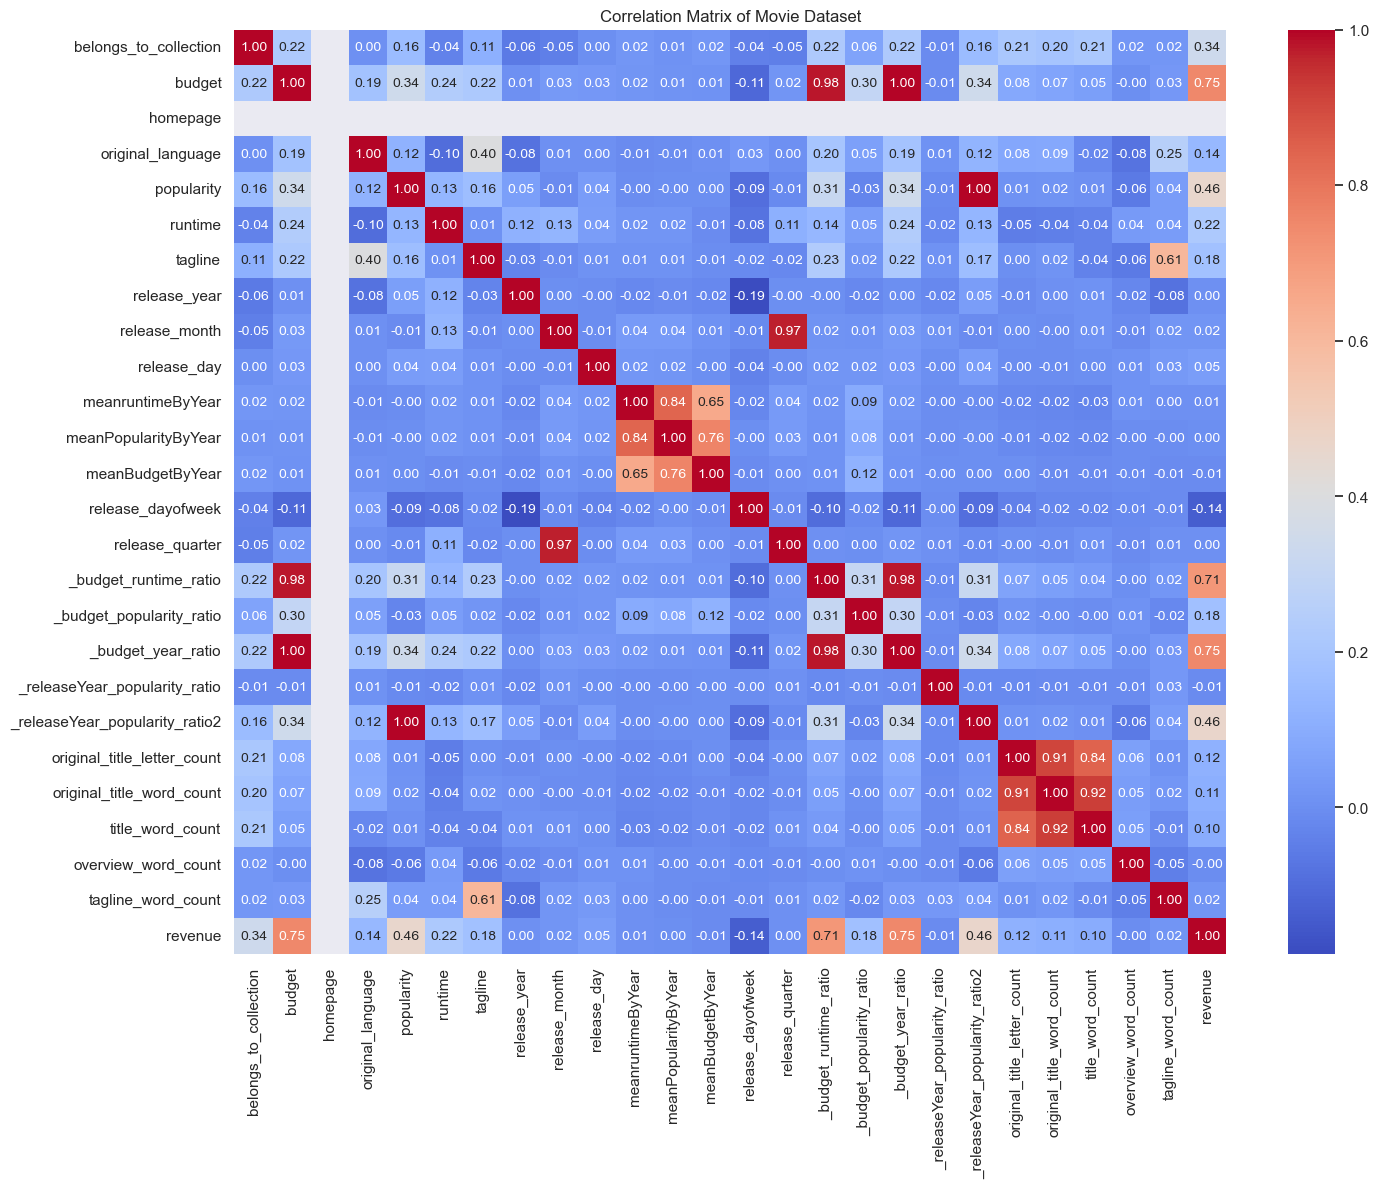

In [39]:
# plots correlation matrix
corr_matrix = movies.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix of Movie Dataset')
plt.show()

In [40]:
# defines the features and the target variable
y = movies['revenue']
X = movies.drop('revenue', axis=1)
X.shape, y.shape

((3000, 25), (3000,))

#### STEP 4B - MODEL IMPLEMENATION

##### MODEL 1 - Decision Tree

In [41]:
def evaluate_k_fold(X, y, k_values):
    # cleans the data & replaces infinite values with NaN and then fill NaNs with column mean
    X.replace([np.inf, -np.inf], np.nan, inplace=True)
    X.fillna(X.mean(), inplace=True)
    # ensures y has no NaN or infinite values
    y.replace([np.inf, -np.inf], np.nan, inplace=True)
    y.fillna(y.mean(), inplace=True)
    results = {}
    for k in k_values:
        kf = KFold(n_splits=k, shuffle=True, random_state=42)
        rmse_scores = []
        for train_index, test_index in kf.split(X):
            # uses .iloc for DataFrame and direct indexing for arrays
            if isinstance(X, pd.DataFrame):
                X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            else:
                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]
            model = DecisionTreeRegressor(random_state=42)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            rmse_scores.append(rmse)
        avg_rmse = np.mean(rmse_scores)
        results[k] = avg_rmse
    return results
# sets diff. values of k
k_values = [3, 5, 7, 10]
# evaluates the model with diff k values
k_fold_results = evaluate_k_fold(X, y, k_values)
print(k_fold_results)


{3: 108422426.34391408, 5: 106624442.20671815, 7: 106343157.2821394, 10: 104975312.83087087}


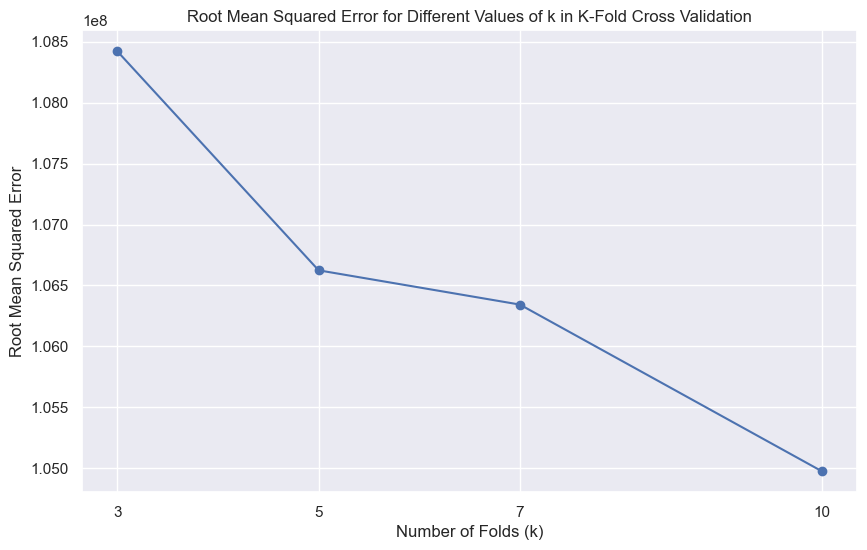

In [42]:
# uses the RMSE scores from the evaluation
k_values = [3, 5, 7, 10]
rmse_scores = [108422426.34391408, 106624442.20671815, 106343157.2821394, 104975312.83087087]

# plots results
plt.figure(figsize=(10, 6))
plt.plot(k_values, rmse_scores, marker='o', linestyle='-', color='b')
plt.title('Root Mean Squared Error for Different Values of k in K-Fold Cross Validation')
plt.xlabel('Number of Folds (k)')
plt.ylabel('Root Mean Squared Error')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [43]:
# shows normalized rmse for optimal k value
range_y = y.max() - y.min()
normalized_rmse =104975312/ range_y
normalized_rmse

0.06908279794949229

In [44]:
# define the parameter grid and does gridsearchcv
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
param_grid = {
    'max_depth': [3, 4, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dtr = DecisionTreeRegressor()
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

In [45]:
# now getting the best possible hyperparameters out of the given above
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_params

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}

Analysis of Hyperparameters
1. Optimal Hyperparameters:
    
max_depth: 5

min_samples_leaf: 1

min_samples_split: 10

In [46]:
# calculates the final mean squared error
best_gbr = DecisionTreeRegressor(**best_params)
best_gbr.fit(X_train, y_train)
y_pred = best_gbr.predict(X_test)
final_rmse = mean_squared_error(y_test, y_pred,squared=False)
final_rmse

96037476.92329603

In [47]:
range_y = y.max() - y.min()
normalized_rmse = final_rmse / range_y
normalized_rmse

0.06320093255708627

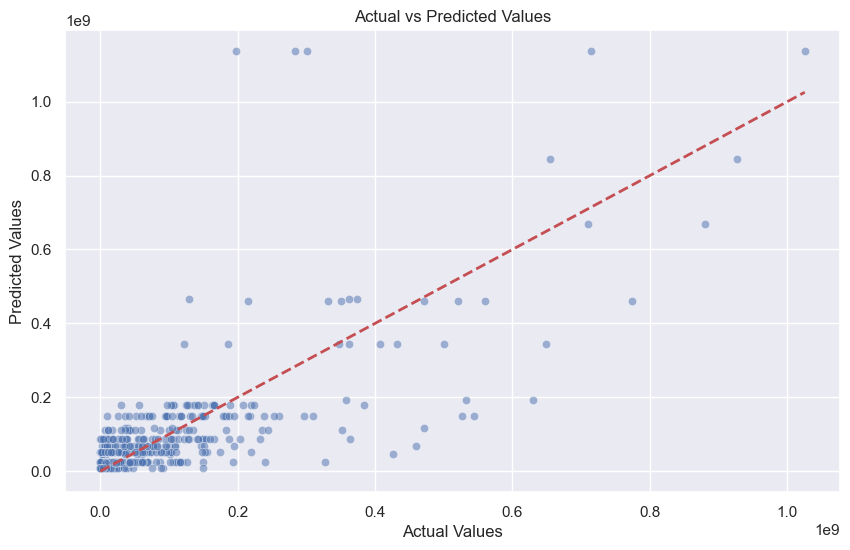

In [48]:
# plots actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

##### MODEL 2 - GRADIENT BOOSTING

In [49]:
def evaluate_k_fold(X, y, k_values):
    # clean the data then replace infinite values with NaN and then fill NaNs with column mean
    X.replace([np.inf, -np.inf], np.nan, inplace=True)
    X.fillna(X.mean(), inplace=True)
    # ensures y has no NaN or infinite values
    y.replace([np.inf, -np.inf], np.nan, inplace=True)
    y.fillna(y.mean(), inplace=True)
    results = {}
    for k in k_values:
        kf = KFold(n_splits=k, shuffle=True, random_state=42)
        rmse_scores = []
        for train_index, test_index in kf.split(X):
            # uses .iloc for DataFrame and direct indexing for arrays
            if isinstance(X, pd.DataFrame):
                X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            else:
                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]
            model = GradientBoostingRegressor()
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            rmse_scores.append(rmse)
        avg_rmse = np.mean(rmse_scores)
        results[k] = avg_rmse
        
    return results
# sets different values of k
k_values = [3, 5, 7, 10]
# evaluates the model with different k values
k_fold_results = evaluate_k_fold(X, y, k_values)
k_fold_results

{3: 78955092.13459729,
 5: 77186110.35027683,
 7: 75681667.80828021,
 10: 75087616.15652747}

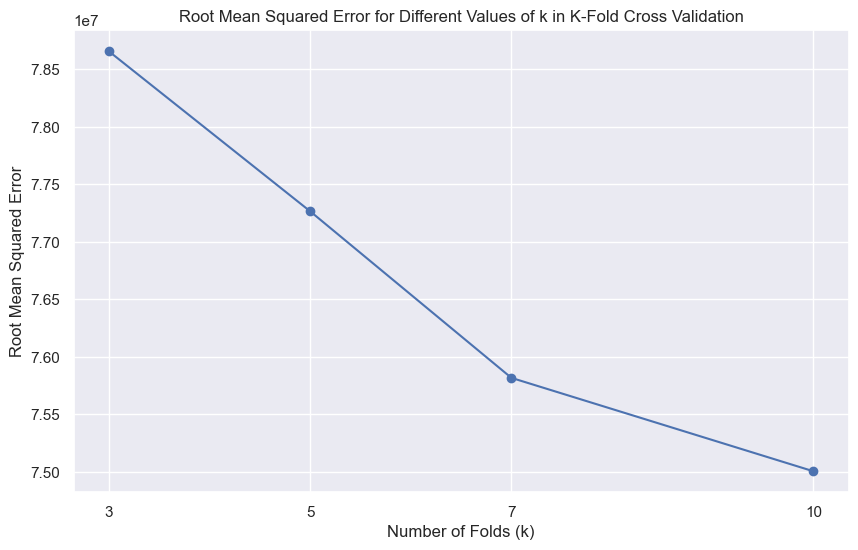

In [50]:
# uses the RMSE scores from the evaluation
k_values = [3, 5, 7, 10]
rmse_scores = [78657932.18742193, 77266446.6223675, 75817626.0062786,75005502.20928816]

# plots results
plt.figure(figsize=(10, 6))
plt.plot(k_values, rmse_scores, marker='o', linestyle='-', color='b')
plt.title('Root Mean Squared Error for Different Values of k in K-Fold Cross Validation')
plt.xlabel('Number of Folds (k)')
plt.ylabel('Root Mean Squared Error')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [51]:
# shows normalized rmse
range_y = y.max() - y.min()
normalized_rmse = 75005502 / range_y
normalized_rmse

0.04936008134718609

In [52]:
# define parameter grid and initializes gridsearchcv
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5]
}
gbr = GradientBoostingRegressor()
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

In [53]:
# gets the best possible hyperparameters
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_params

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}

Hyperparameters analysis
Optimal Hyperparameters:
    
learning_rate: 0.1


max_depth: 4


n_estimators: 100


In [54]:
# makes predictions & calculates final mean squared error
best_gbr = GradientBoostingRegressor(**best_params)
best_gbr.fit(X_train, y_train)
y_pred = best_gbr.predict(X_test)
final_rmse = mean_squared_error(y_test, y_pred,squared=False)
final_rmse

78188295.56750561

In [55]:
# shows normalized rmse
range_y = y.max() - y.min()
normalized_rmse = final_rmse/ range_y
normalized_rmse

0.05145463368287178

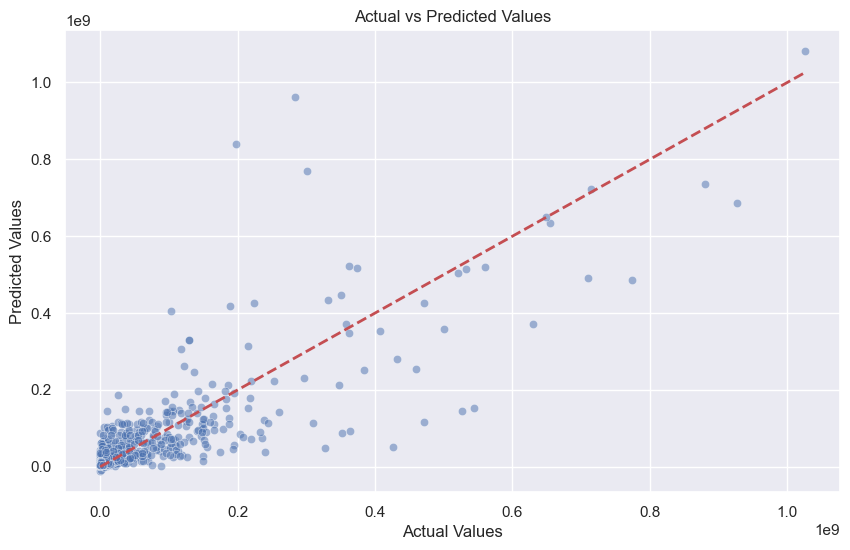

In [56]:
#plots actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

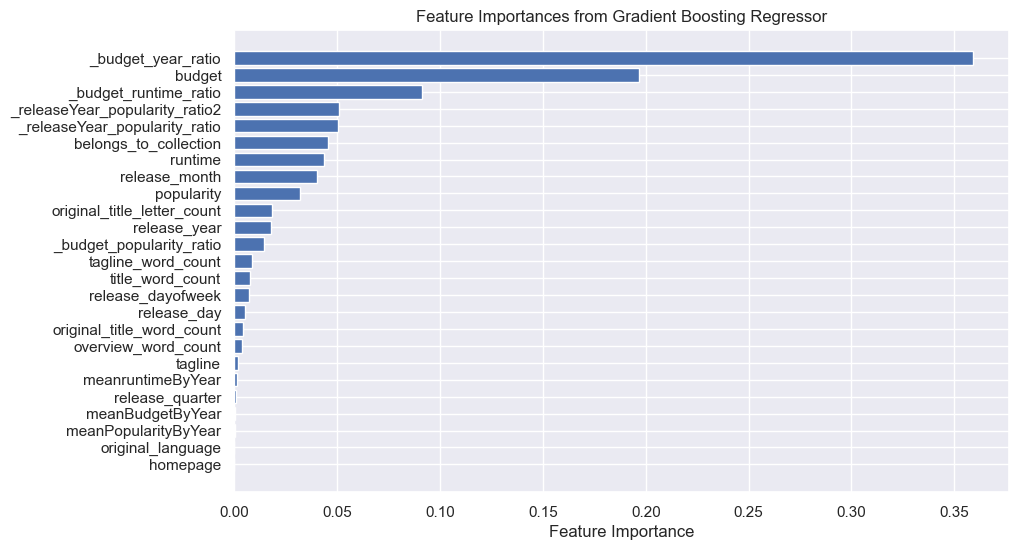

In [57]:
# feature importance
feature_importances = best_gbr.feature_importances_
feature_names = movies.loc[:, movies.columns != 'revenue'].columns
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
# plots the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='b')
plt.xlabel('Feature Importance')
plt.title('Feature Importances from Gradient Boosting Regressor')
plt.gca().invert_yaxis()
plt.show()

In [58]:
feature_importances_df[:10]

,Feature,Importance
17,_budget_year_ratio,0.358871
1,budget,0.196539
15,_budget_runtime_ratio,0.091286
19,_releaseYear_popularity_ratio2,0.050870
18,_releaseYear_popularity_ratio,0.050383
0,belongs_to_collection,0.045714
5,runtime,0.043735
8,release_month,0.040043
4,popularity,0.032085
20,original_title_letter_count,0.018314


##### Model 3: XGBoost

In [59]:
! pip install xgboost

In [60]:
def evaluate_k_fold(X, y, k_values):
    # cleans the data: replace infinite values with NaN and then fill NaNs with column mean
    X.replace([np.inf, -np.inf], np.nan, inplace=True)
    X.fillna(X.mean(), inplace=True)
    # ensure y has no NaN or infinite values
    y.replace([np.inf, -np.inf], np.nan, inplace=True)
    y.fillna(y.mean(), inplace=True)
    results = {}
    for k in k_values:
        kf = KFold(n_splits=k, shuffle=True, random_state=42)
        rmse_scores = []
        for train_index, test_index in kf.split(X):
            # uses .iloc for DataFrame and direct indexing for arrays
            if isinstance(X, pd.DataFrame):
                X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            else:
                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]
            model = XGBRegressor()
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            rmse_scores.append(rmse)
        avg_rmse = np.mean(rmse_scores)
        results[k] = avg_rmse

    return results
# sets different values of k
k_values = [3, 5, 7, 10]
# evaluates the model with diff k vals
k_fold_results = evaluate_k_fold(X, y, k_values)
k_fold_results

{3: 84093272.68965982,
 5: 82215541.2864164,
 7: 80055120.44060315,
 10: 77326998.54761569}

In [61]:
range_y = y.max() - y.min()
normalized_rmse = 77326998 / range_y
normalized_rmse

0.050887825690623285

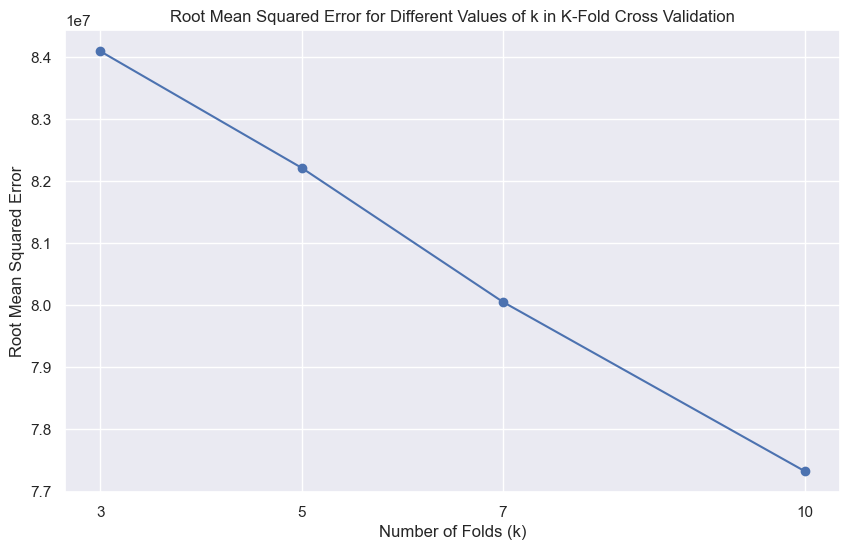

In [62]:
# uses the RMSE scores from the evaluation
k_values = [3, 5, 7, 10]
rmse_scores = [84093272.68965982, 82215541.2864164, 80055120.44060315,77326998.54761569]

# plots results
plt.figure(figsize=(10, 6))
plt.plot(k_values, rmse_scores, marker='o', linestyle='-', color='b')
plt.title('Root Mean Squared Error for Different Values of k in K-Fold Cross Validation')
plt.xlabel('Number of Folds (k)')
plt.ylabel('Root Mean Squared Error')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [63]:
# gridsearchcv
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5]
}
gbr = XGBRegressor()
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

In [64]:
# gets the best parameters
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_params

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}

In [65]:
# calculates final mean squared error
best_xg = XGBRegressor(**best_params)
best_xg.fit(X_train, y_train)
y_pred = best_gbr.predict(X_test)
final_rmse = mean_squared_error(y_test, y_pred,squared=False)
final_rmse

78188295.56750561

In [66]:
# gives normalized rmse
range_y = y.max() - y.min()
normalized_rmse = 74186583.36143349 / range_y
normalized_rmse

0.04882116234073281

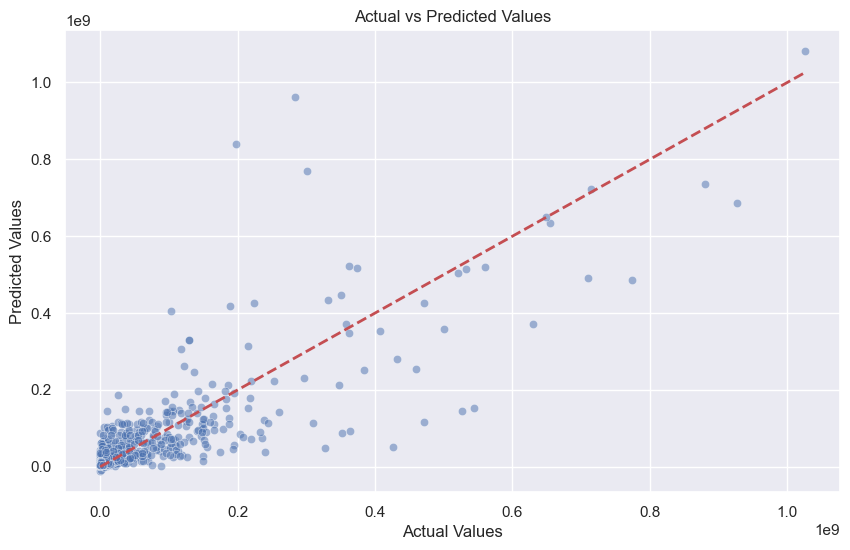

In [67]:
# plots actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

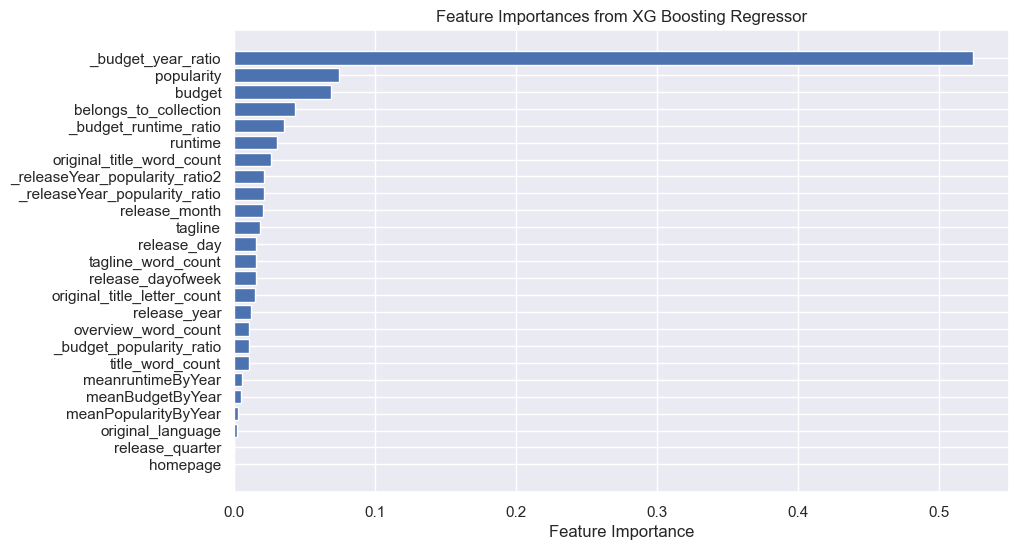

In [68]:
# feature importance
feature_importances = best_xg.feature_importances_
feature_names = movies.loc[:, movies.columns != 'revenue'].columns
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
# plots the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='b')
plt.xlabel('Feature Importance')
plt.title('Feature Importances from XG Boosting Regressor')
plt.gca().invert_yaxis()
plt.show()

In [69]:
feature_importances_df[:10]

,Feature,Importance
17,_budget_year_ratio,0.523667
4,popularity,0.074130
1,budget,0.068517
0,belongs_to_collection,0.042935
15,_budget_runtime_ratio,0.035324
5,runtime,0.029988
21,original_title_word_count,0.025784
19,_releaseYear_popularity_ratio2,0.021299
18,_releaseYear_popularity_ratio,0.021170
8,release_month,0.020143


##### Model 4 : Random Forest

In [70]:
def evaluate_k_fold(X, y, k_values):
    # clean the data & replaces infinite values with NaN and then fill NaNs with column mean
    X.replace([np.inf, -np.inf], np.nan, inplace=True)
    X.fillna(X.mean(), inplace=True)
    # ensures y has no NaN or infinite values
    y.replace([np.inf, -np.inf], np.nan, inplace=True)
    y.fillna(y.mean(), inplace=True)
    results = {}
    for k in k_values:
        kf = KFold(n_splits=k, shuffle=True, random_state=42)
        rmse_scores = []
        for train_index, test_index in kf.split(X):
            # uses .iloc for DataFrame and direct indexing for arrays
            if isinstance(X, pd.DataFrame):
                X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            else:
                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]
            model = RandomForestRegressor()
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            rmse_scores.append(rmse)
        avg_rmse = np.mean(rmse_scores)
        results[k] = avg_rmse
        
    return results
# sets different values of k
k_values = [3, 5, 7, 10]
# evaluates the model with different values of k
k_fold_results = evaluate_k_fold(X, y, k_values)
k_fold_results
        


{3: 78561269.1255474,
 5: 77524073.33472618,
 7: 77795809.8142315,
 10: 76036552.99712233}

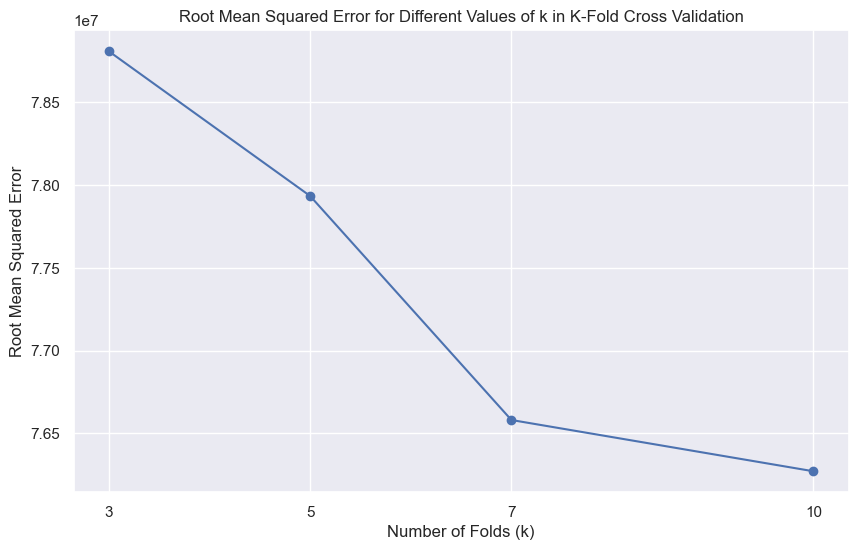

In [71]:
# uses the RMSE scores from the evaluation
k_values = [3, 5, 7, 10]
rmse_scores = [78807963.31411028, 77934061.30530989, 76581132.20227367,76271628.2199146]

# plots results
plt.figure(figsize=(10, 6))
plt.plot(k_values, rmse_scores, marker='o', linestyle='-', color='b')
plt.title('Root Mean Squared Error for Different Values of k in K-Fold Cross Validation')
plt.xlabel('Number of Folds (k)')
plt.ylabel('Root Mean Squared Error')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [72]:
range_y = y.max() - y.min()
normalized_rmse = 76271628/ range_y
normalized_rmse

0.050193301320246034

In [73]:
# defines the parameter grid & does gridsearchcv
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rfr = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)


In [74]:
# gets the best parameter
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_params

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [75]:
# calcs final mse
best_rf = RandomForestRegressor(**best_params)
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)
final_rmse = mean_squared_error(y_test, y_pred,squared=False)
final_rmse

73542507.25167158

In [76]:
# shows normalized rmse
range_y = y.max() - y.min()
normalized_rmse = final_rmse / range_y
normalized_rmse

0.04839730477930182

###### Our final normalized RMSE from Random Forest is coming as 0.048

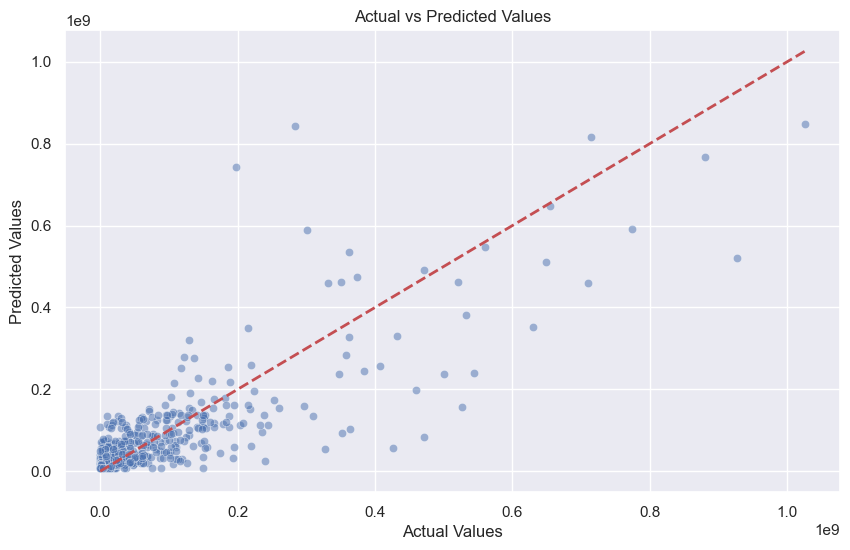

In [77]:
# plots actual v preducted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

##### Model 5: Linear Regression

In [78]:
def evaluate_k_fold(X, y, k_values):
    # cleans the data & replaces infinite values with NaN and then fill NaNs with column mean
    X.replace([np.inf, -np.inf], np.nan, inplace=True)
    X.fillna(X.mean(), inplace=True)
    y.replace([np.inf, -np.inf], np.nan, inplace=True)
    y.fillna(y.mean(), inplace=True)
    results = {}
    for k in k_values:
        kf = KFold(n_splits=k, shuffle=True, random_state=42)
        rmse_scores = []
        for train_index, test_index in kf.split(X):
            if isinstance(X, pd.DataFrame):
                X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            else:
                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]
            model = LinearRegression()
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            rmse_scores.append(rmse)
        avg_rmse = np.mean(rmse_scores)
        results[k] = avg_rmse
        
    return results
# sets different values of k
k_values = [3, 5, 7, 10]
# evaluates model with different vals of k
k_fold_results = evaluate_k_fold(X, y, k_values)
print(k_fold_results)

{3: 211187024.078405, 5: 213230832.1458457, 7: 133039463.10636576, 10: 135836877.6366664}


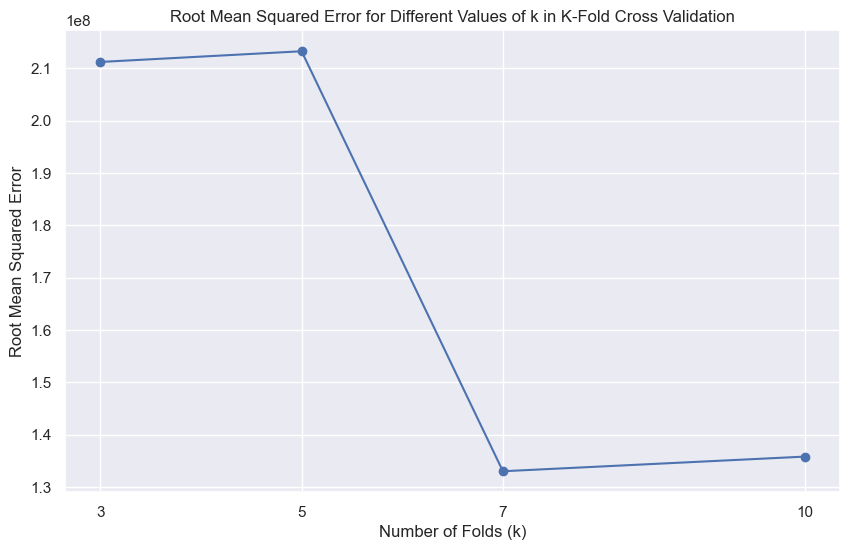

In [79]:
# uses the RMSE scores from the evaluation
k_values = [3, 5, 7, 10]
rmse_scores = [211187024.1859314, 213230832.04663357, 133039462.98544152,135836877.31973514]

# plots results
plt.figure(figsize=(10, 6))
plt.plot(k_values, rmse_scores, marker='o', linestyle='-', color='b')
plt.title('Root Mean Squared Error for Different Values of k in K-Fold Cross Validation')
plt.xlabel('Number of Folds (k)')
plt.ylabel('Root Mean Squared Error')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [80]:
range_y = y.max() - y.min()
normalized_rmse = 135836877 / range_y
normalized_rmse

0.08939236615825479

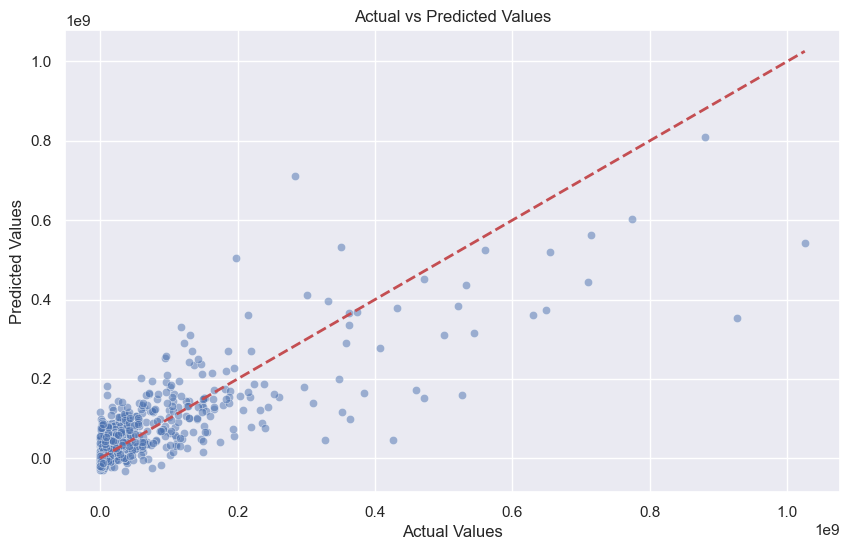

In [81]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# plots actual v preducted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()